In [1]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\EdwardJansenADC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\EdwardJansenADC\\.matplotlib'

# Data Exploration

### Load data

Here, we load data and figure out which variables are numeric and categorical. Also, we have a first look at the dataframe. Notebook has a very nice dataframe viewer that lets us navigate the frame easily.

In [3]:
df = pd.read_csv('data/randomisedData.csv')
cols = df.columns
numvars = cols[df.dtypes != 'object']
cats = cols[df.dtypes == 'object']

In [4]:
print(cols)
print(numvars)
print(cats)
print("")
print("Q: Have we done this correctly? A: "+ str(len(cats) + len(numvars) == len(cols)) )

Index(['ID', 'period', 'arrears.amount', 'loan.amount', 'no.months.default',
       'arrears.at.default', 'ltv', 'market.value', 'interest', 'region',
       'housing', 'maturity.remaining', 'gender', 'cust.age',
       'years.as.customer', 'target'],
      dtype='object')
Index(['ID', 'arrears.amount', 'loan.amount', 'no.months.default',
       'arrears.at.default', 'ltv', 'market.value', 'interest',
       'maturity.remaining', 'cust.age', 'years.as.customer', 'target'],
      dtype='object')
Index(['period', 'region', 'housing', 'gender'], dtype='object')

Q: Have we done this correctly? A: True


In [5]:
df

,ID,period,arrears.amount,loan.amount,no.months.default,arrears.at.default,ltv,market.value,interest,region,housing,maturity.remaining,gender,cust.age,years.as.customer,target
0,1,2009-11-01,857.329788,25115.573925,9,857.329788,0.133927,187532.278850,5.100,Flevoland,Single family house,44,Unknown,110,12,1
1,1,2010-02-01,857.329788,23854.722600,12,857.329788,0.130848,182309.251667,5.100,Flevoland,Single family house,41,Unknown,110,12,1
2,1,2010-05-01,857.329788,22577.723866,15,857.329788,0.125710,179601.012778,5.100,Flevoland,Single family house,38,Unknown,110,12,1
3,1,2010-08-01,857.329788,21284.369504,18,857.329788,0.119539,178053.442828,5.100,Flevoland,Single family house,35,Unknown,111,13,1
4,2,2010-08-01,1069.136341,38034.356717,3,1069.136341,0.168461,225774.908577,5.200,Noord-Holland,Single family house,561,Unknown,107,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,2830,2012-11-01,16804.902036,290768.518856,6,15621.477931,0.674029,431388.814456,6.486,Overijssel,Shop/private house,7,Unknown,45,13,1
7862,2831,2011-06-01,337.340000,125602.956323,2,337.340000,0.729341,172214.338773,5.979,Utrecht,Flat/appartment,15,Unknown,33,6,1
7863,2832,2012-06-01,43036.594322,659998.592244,12,43036.594322,0.906410,728145.685885,3.606,Friesland,Rural estate,273,Unknown,49,0,1
7864,2832,2012-09-01,49297.893578,659998.592244,15,43036.594322,0.917205,719575.914818,3.027,Friesland,Rural estate,270,Unknown,49,0,1


## Have a first look: check distributions

Now, our first task is to get an idea what kind of variables are in the dataframe and to just get a feel for the data. There are various ways of doing this. It is convenient to consider numeric and categorical variables separately. In this phase, we should also be looking for outliers and see if we can come up with a good strategy to treat them.

### Numerical variables

The numeric variables are usually the most straightforward to explore, since we can easily visualize them by e.g. plotting. A very dry but useful way of diving into them is by looking into their percentiles. Not as fancy as a pimped up histogram or scatterplot, but typically very insightful. Tip: look at the difference between the 99th percentile and max to quickly spot outliers.

In [8]:
df.describe(percentiles = [0.01, 0.05, .25, .5, .75, 0.95, 0.99])

,ID,arrears.amount,loan.amount,no.months.default,arrears.at.default,ltv,market.value,interest,maturity.remaining,cust.age,years.as.customer,target
count,7866.000000,7866.000000,7.866000e+03,7866.000000,7866.000000,7866.000000,7.866000e+03,7866.000000,7866.000000,7866.000000,7866.000000,7866.000000
mean,1413.739258,5713.754547,2.068190e+05,11.429062,4394.007626,0.927771,2.580137e+05,4.753750,246.141749,48.272438,9.488813,0.615688
std,818.876014,9562.429037,1.185879e+05,11.096358,6357.074686,0.494258,1.778129e+05,1.141062,71.250047,13.737967,6.584494,0.486463
min,1.000000,0.670000,1.514200e+02,1.000000,1.566177,0.000352,1.371506e+04,-0.300000,0.000000,8.000000,0.000000,0.000000
1%,41.650000,42.550000,5.891410e+03,1.000000,46.948347,0.024359,4.725421e+04,1.738975,7.650000,21.000000,0.000000,0.000000
5%,162.000000,158.074660,5.206637e+04,1.000000,186.034573,0.242601,8.996396e+04,2.750000,130.000000,28.000000,1.000000,0.000000
25%,699.250000,896.049248,1.311269e+05,4.000000,969.818497,0.684347,1.511025e+05,4.084600,217.000000,39.000000,4.000000,0.000000
50%,1395.500000,2506.767988,1.846890e+05,8.000000,2402.005827,0.891882,2.084895e+05,4.900000,250.000000,48.000000,9.000000,1.000000
75%,2123.000000,6996.925387,2.578993e+05,15.000000,5352.385919,1.120936,3.103994e+05,5.550000,285.000000,56.000000,14.000000,1.000000
95%,2695.000000,20478.187933,4.312675e+05,34.000000,15190.357525,1.597657,5.896300e+05,6.393475,328.000000,71.000000,22.000000,1.000000


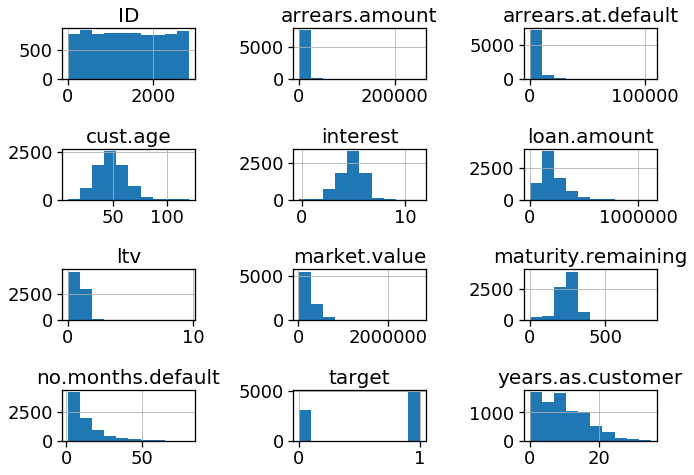

In [23]:
df[numvars].hist();

It looks like there are no obvious outliers, so for now, we'll decide to not make any adjustments to the data. Note that there are some fattailed variables like loan.amount. These are all always a bit tricky to deal with as typically then deviate a lot from the mean/median. One way of assessing the plausibility of very high values us to estimate a distribution based on the 0th to 99th percentile and see whether the max lies within (or close to) that distribition.

### Categorical variables

For the categorical variables, let's first check how many unique value each variable contains.

In [28]:
df[cats].nunique()

period     157
region      13
housing     12
gender       3
dtype: int64

Ah, that simplifies the situations. It looks like the number of categories is not too big. In that case, let's just print all the unique values.

In [38]:
print("Unique values in categorical variables:")
for i in cats:
    print("")
    print(i)
    print(df[i].unique() )

Unique values in categorical variables:

period
['2009-11-01' '2010-02-01' '2010-05-01' '2010-08-01' '2010-11-01'
 '2009-10-01' '2010-01-01' '2008-09-01' '2010-03-01' '2008-10-01'
 '2009-01-01' '2009-04-01' '2010-07-01' '2010-10-01' '2006-09-01'
 '2008-02-01' '2008-05-01' '2008-11-01' '2009-02-01' '2009-05-01'
 '2010-04-01' '2010-06-01' '2011-06-01' '2009-06-01' '2009-09-01'
 '2009-12-01' '2010-09-01' '2011-09-01' '2011-12-01' '2011-02-01'
 '2011-05-01' '2008-12-01' '2009-03-01' '2011-03-01' '2009-08-01'
 '2009-07-01' '2008-07-01' '2012-01-01' '2013-03-01' '2013-06-01'
 '2012-03-01' '2010-12-01' '2012-06-01' '2011-01-01' '2011-04-01'
 '2008-08-01' '2011-07-01' '2011-10-01' '2011-08-01' '2008-04-01'
 '2013-01-01' '2013-05-01' '2008-01-01' '2015-03-01' '2015-06-01'
 '2015-09-01' '2015-12-01' '2016-03-01' '2007-08-01' '2015-05-01'
 '2015-08-01' '2015-11-01' '2016-12-01' '2017-06-01' '2017-09-01'
 '2017-12-01' '2018-04-01' '2018-07-01' '2018-10-01' '2012-12-01'
 '2017-04-01' '2017-07-01' '

To get an idea of how the observations are distributed over the categories, let's convert the strings to numbers to be able to plot distributions.

In [6]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in cats[0::]:
    df[i] = LE.fit_transform(df[i])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


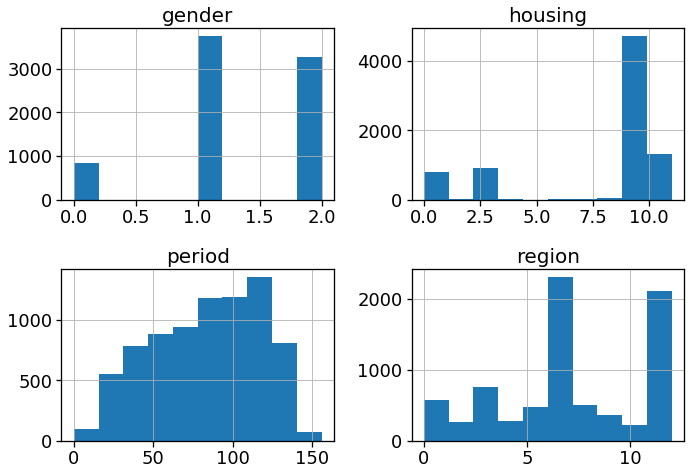

In [7]:
df[cats].hist();

We see that some regions and housing types are quite overpopulated. That is not necessarily worrisome, but for advanced analysis it could be worth diving deeper into this. For this simple demonstration, we'll just leave things as they are.

## Check for missing values

Apart from getting a feel for the data, the second formality we have to tick off (the first being outlier detection) is the handling of missing data. Here, we only find missing values. They are not necessarily treated right away. Depending on the where the values are missing and how many values are missing, we might come up with different treatment strategies. We might also come up with different models based on how we treat the missing values. 

A very simple approach to treating missing values is the following. If in a variable the percentage of values missing is less than a certain threshold (say 0.3), then impute the missing values by some statistic (typically median, although I would naively argue for the mode as it is the most likely value). If more than 30% is missing, drop the variable.

In [42]:
df.isnull().sum()

ID                    0
period                0
arrears.amount        0
loan.amount           0
no.months.default     0
arrears.at.default    0
ltv                   0
market.value          0
interest              0
region                0
housing               0
maturity.remaining    0
gender                0
cust.age              0
years.as.customer     0
target                0
dtype: int64

We're in luck. Fate has given us a dataset without missing values, so we can proceed without worries to the next step.